In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

In [0]:
from google.colab import files
uploaded = files.upload()

Saving HW4_movie_metadata.csv to HW4_movie_metadata.csv


In [0]:
df = pd.read_csv('HW4_movie_metadata.csv')
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


**Find null ratio in each collumn**

In [0]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
print(missing_value_df)

                                         column_name  percent_missing
gross                                          gross        17.529248
budget                                        budget         9.756098
aspect_ratio                            aspect_ratio         6.523895
content_rating                        content_rating         6.008328
plot_keywords                          plot_keywords         3.033908
title_year                                title_year         2.141582
director_name                          director_name         2.062265
director_facebook_likes      director_facebook_likes         2.062265
num_critic_for_reviews        num_critic_for_reviews         0.991473
actor_3_name                            actor_3_name         0.456078
actor_3_facebook_likes        actor_3_facebook_likes         0.456078
num_user_for_reviews            num_user_for_reviews         0.416419
duration                                    duration         0.297442
actor_2_name        

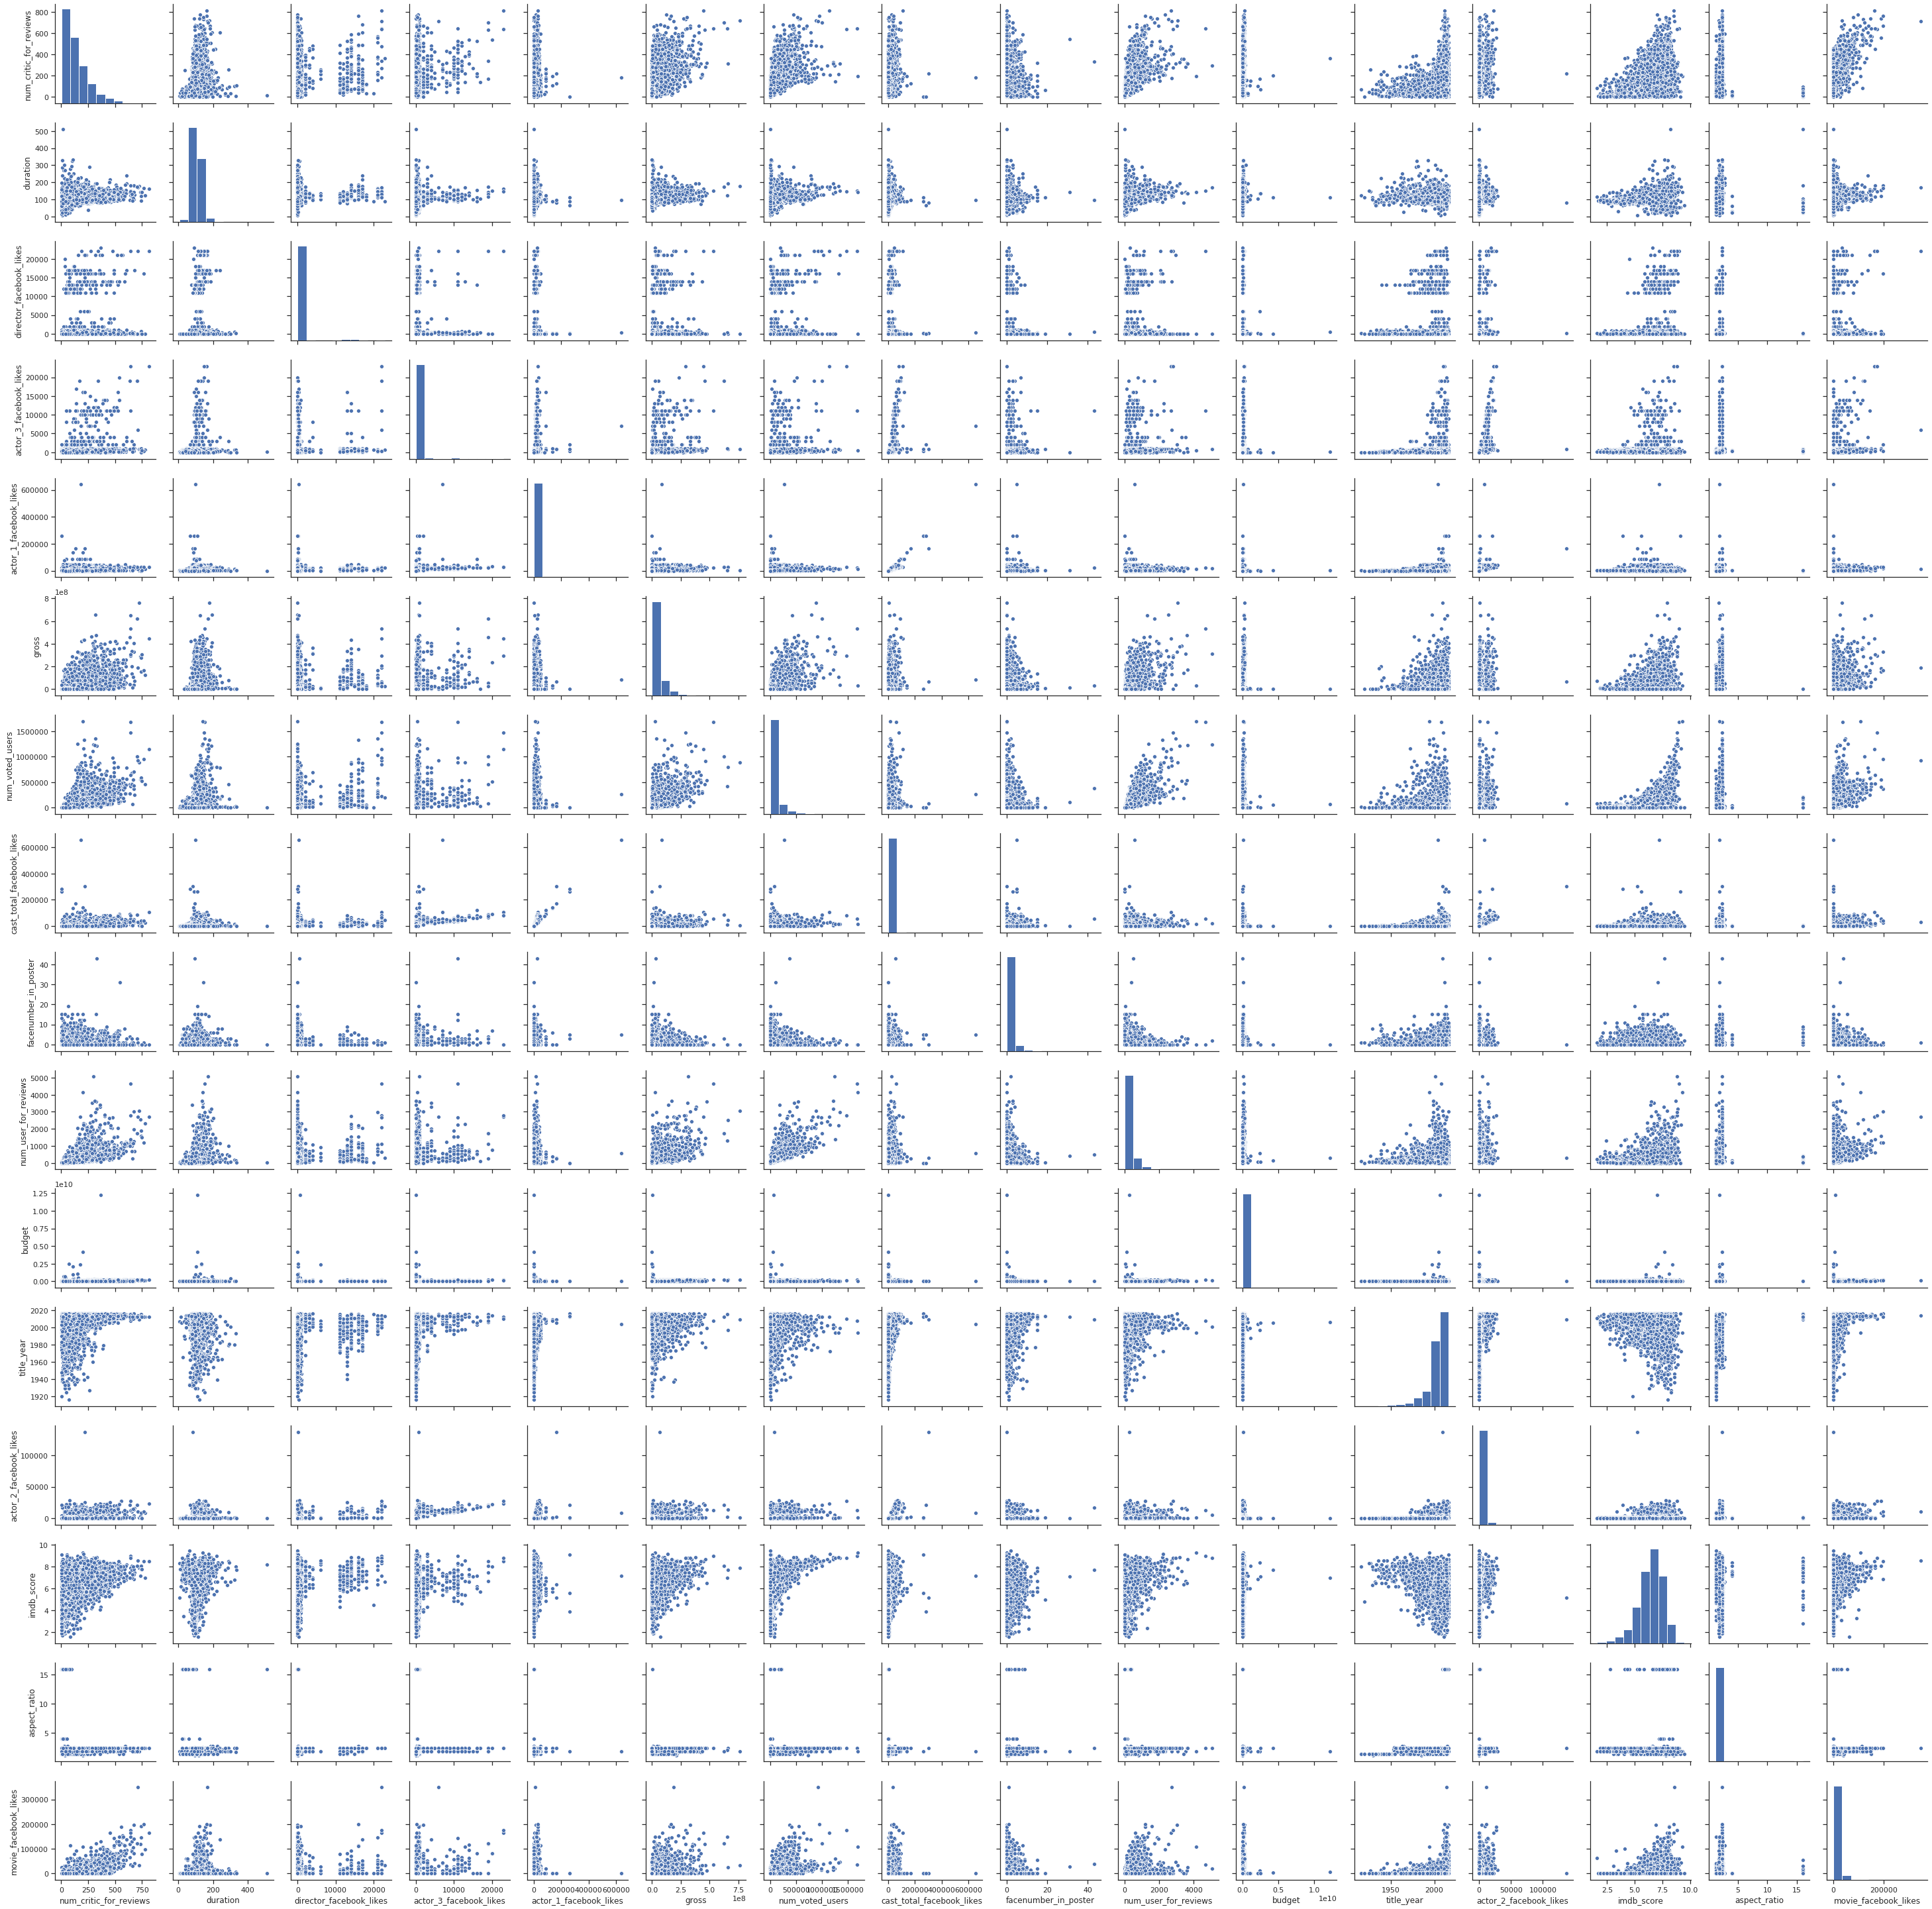

In [0]:
sns.set(style="ticks")
sns.pairplot(df)

In [0]:
cols = ['num_critic_for_reviews','movie_facebook_likes','gross','num_user_for_reviews','num_voted_users']
selected_cols = df[cols]
droped_df = selected_cols.dropna()
# corr = droped_df.corr(method ='pearson') 

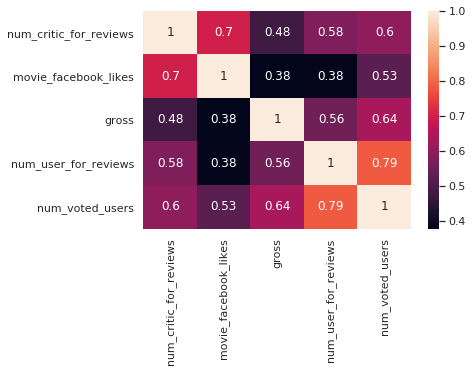

In [0]:
sns.set()
ax = sns.heatmap(corr,annot=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
#function
def train_test_rmse(x,y,z):
    x = droped_df[x].values.reshape(-1,1)
    y = droped_df[y].values.reshape(-1,1)
    z = z
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35,random_state=z)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print('Score :',accuracy_score(y_test, y_pred.argmax(axis=1)))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return linreg.coef_, linreg.intercept_

In [0]:
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',123))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',12))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',42))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',53))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',101))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',122))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',112))
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',10))

Score : 0.44673539518900346
RMSE : 15006.70023953752
(array([[123.65721106]]), array([-10695.73233957]))
Score : 0.4357388316151203
RMSE : 14423.951791609565
(array([[117.43410853]]), array([-9941.57297447]))
Score : 0.44123711340206184
RMSE : 14199.486046181748
(array([[121.7488054]]), array([-10595.58994306]))
Score : 0.4563573883161512
RMSE : 17354.55490608099
(array([[111.63691787]]), array([-9276.410487]))
Score : 0.4515463917525773
RMSE : 16773.800144419114
(array([[117.35835354]]), array([-10058.8665625]))
Score : 0.4350515463917526
RMSE : 13366.06968663117
(array([[124.41190865]]), array([-11048.80701482]))
Score : 0.44604810996563576
RMSE : 14899.851753523755
(array([[115.03409708]]), array([-9835.71862337]))
Score : 0.44810996563573885
RMSE : 16578.878693514103
(array([[110.76011825]]), array([-9251.00494462]))


In [0]:
print(train_test_rmse('num_critic_for_reviews','movie_facebook_likes',101))

Score : 0.4567307692307692
RMSE : 13236.582255542078
(array([[122.28713323]]), array([-10647.63513302]))


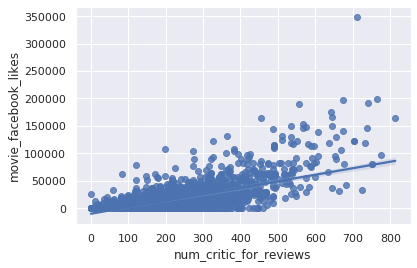

In [0]:
ax = sns.regplot(x='num_critic_for_reviews', y='movie_facebook_likes', data=droped_df)

In [40]:
log_col = ['num_user_for_reviews', 'num_voted_users', 'gross']
df_log = np.log(selected_cols[log_col])
df_log.columns = ['log_'+col for col in df_log.columns]
df_log.head()


,log_num_user_for_reviews,log_num_voted_users,log_gross
0,8.024207,13.694702,20.449494
1,7.121252,13.063080,19.550159
2,6.901737,12.527678,19.114199
3,7.901377,13.950336,19.920595
4,NaN,2.079442,NaN


In [0]:
drop3 = selected_cols.dropna(thresh=3)
filled_drop3 = drop3.fillna(drop3.median())
filled_drop3.head()

,num_critic_for_reviews,movie_facebook_likes,gross,num_user_for_reviews,num_voted_users
0,723.0,33000,760505847.0,3054.0,886204
1,302.0,0,309404152.0,1238.0,471220
2,602.0,85000,200074175.0,994.0,275868
3,813.0,164000,448130642.0,2701.0,1144337
5,462.0,24000,73058679.0,738.0,212204


In [41]:
drop3_log = df_log.dropna(thresh=3)
filled_drop3_log = drop3_log.fillna(drop3_log.median())
filled_drop3_log.append(filled_drop3['num_critic_for_reviews'])
filled_drop3_log = pd.concat([filled_drop3['num_critic_for_reviews'],filled_drop3['movie_facebook_likes'],filled_drop3_log],axis=1)
filled_drop3_log.head()

,num_critic_for_reviews,movie_facebook_likes,log_num_user_for_reviews,log_num_voted_users,log_gross
0,723.0,33000,8.024207,13.694702,20.449494
1,302.0,0,7.121252,13.063080,19.550159
2,602.0,85000,6.901737,12.527678,19.114199
3,813.0,164000,7.901377,13.950336,19.920595
5,462.0,24000,6.603944,12.265303,18.106773


In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_minmax = pd.DataFrame(MinMaxScaler().fit_transform(filled_drop3), columns=filled_drop3.columns)
df_standard = pd.DataFrame(StandardScaler().fit_transform(filled_drop3), columns=filled_drop3.columns)

X_minmax = df_minmax.iloc[:,:-1]
X_standard = df_standard.iloc[:,:-1]

y = filled_drop3['num_critic_for_reviews']

In [0]:
df_minmax_log = pd.DataFrame(MinMaxScaler().fit_transform(filled_drop3_log), columns=filled_drop3_log.columns)
df_standard_log = pd.DataFrame(StandardScaler().fit_transform(filled_drop3_log), columns=filled_drop3_log.columns)

X_minmax_log = df_minmax.iloc[:,:-1]
X_standard_log = df_standard.iloc[:,:-1]

y_log = filled_drop3_log['num_critic_for_reviews']

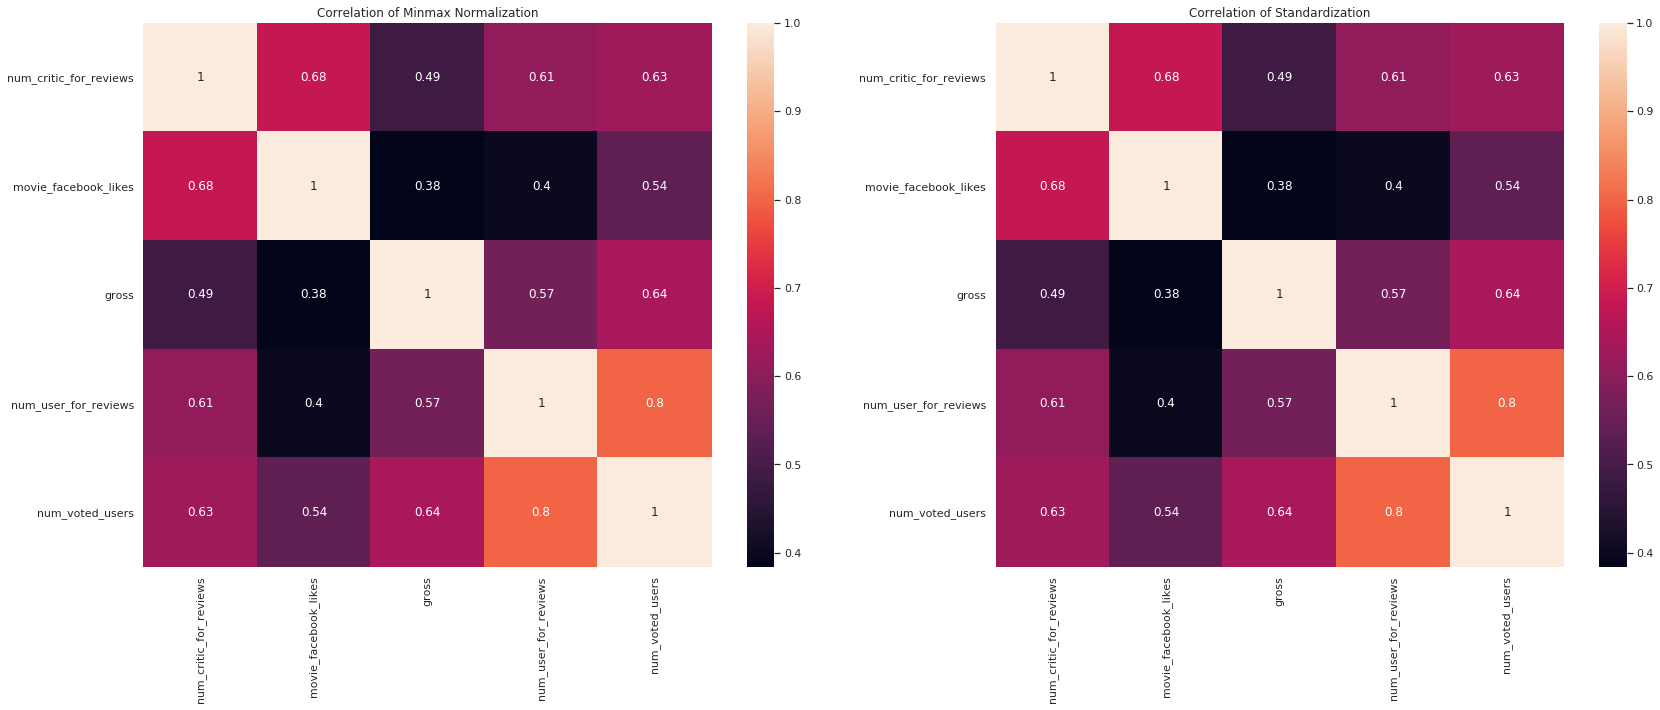

In [44]:
corr_minmax = df_minmax.corr()
corr_standard = df_standard.corr()

plt.figure(figsize=(28,10))
plt.subplot(121)
plt.title('Correlation of Minmax Normalization')
sns.heatmap(corr_minmax, annot=True)
plt.subplot(122)
plt.title('Correlation of Standardization')
sns.heatmap(corr_standard, annot=True)
plt.show()

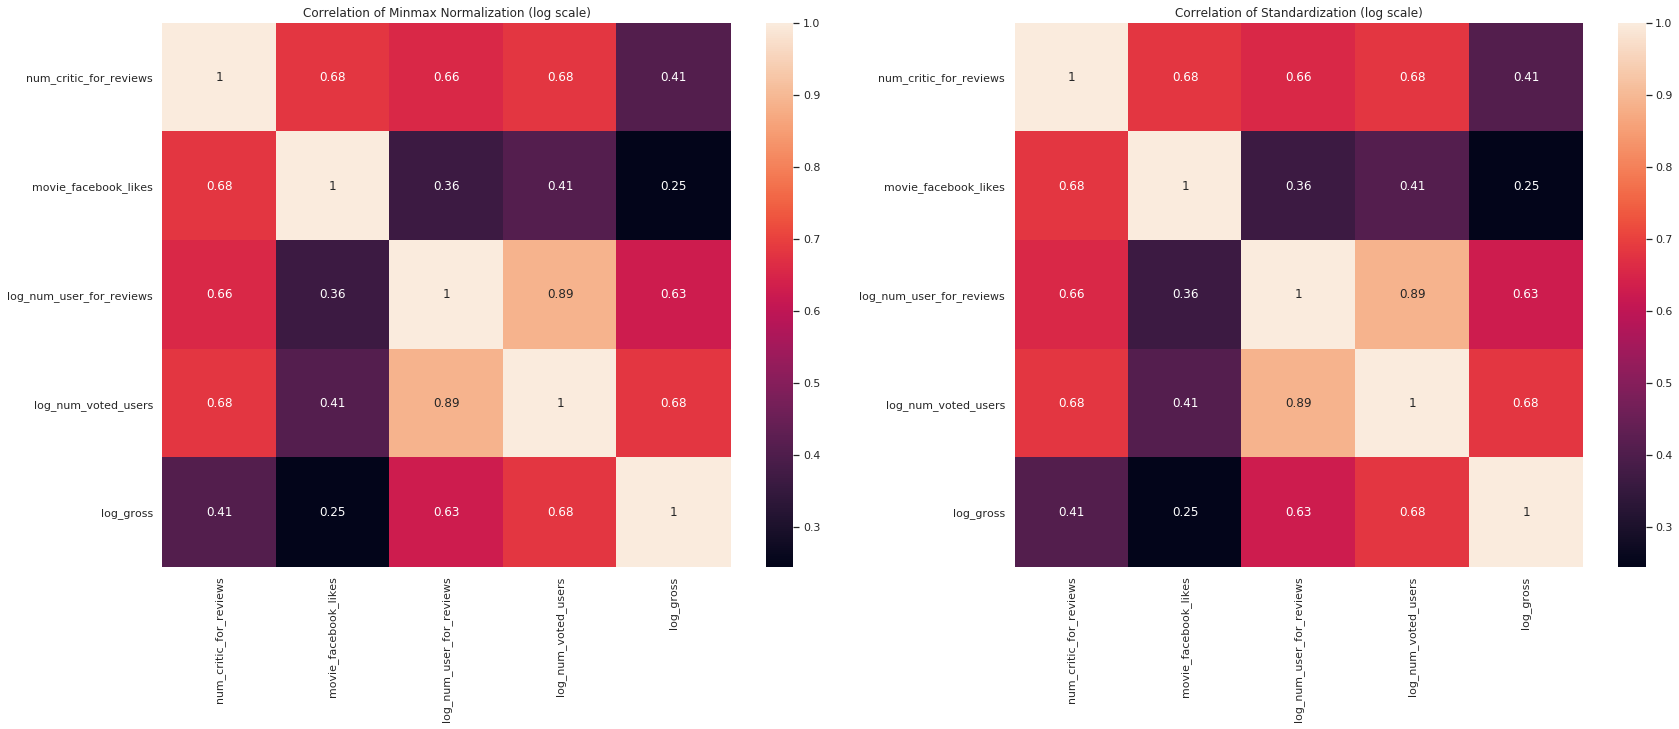

In [45]:
corr_minmax_log = df_minmax_log.corr()
corr_standard_log = df_standard_log.corr()

plt.figure(figsize=(28,10))
plt.subplot(121)
plt.title('Correlation of Minmax Normalization (log scale)')
sns.heatmap(corr_minmax_log, annot=True)
plt.subplot(122)
plt.title('Correlation of Standardization (log scale)')
sns.heatmap(corr_standard_log, annot=True)
plt.show()

In [46]:
corr_minmax_log[corr_minmax_log['num_critic_for_reviews'] > 0.5]['num_critic_for_reviews'].sort_values()[:-1]

log_num_user_for_reviews    0.656187
log_num_voted_users         0.682921
movie_facebook_likes        0.683318
Name: num_critic_for_reviews, dtype: float64

In [47]:
corr_standard_log[corr_standard_log['num_critic_for_reviews'] > 0.5]['num_critic_for_reviews'].sort_values()[:-1]

log_num_user_for_reviews    0.656187
log_num_voted_users         0.682921
movie_facebook_likes        0.683318
Name: num_critic_for_reviews, dtype: float64

In [48]:
corr_minmax[corr_minmax['num_critic_for_reviews'] > 0.5]['num_critic_for_reviews'][:-1]

num_critic_for_reviews    1.000000
movie_facebook_likes      0.683318
num_user_for_reviews      0.609417
Name: num_critic_for_reviews, dtype: float64

In [49]:
df_minmax_log[['log_num_user_for_reviews', 'movie_facebook_likes', 'log_num_voted_users']].corr()

,log_num_user_for_reviews,movie_facebook_likes,log_num_voted_users
log_num_user_for_reviews,1.000000,0.363553,0.888058
movie_facebook_likes,0.363553,1.000000,0.411220
log_num_voted_users,0.888058,0.411220,1.000000


In [50]:
corr_standard[corr_standard['num_critic_for_reviews'] > 0.5]['num_critic_for_reviews'][:-1]

num_critic_for_reviews    1.000000
movie_facebook_likes      0.683318
num_user_for_reviews      0.609417
Name: num_critic_for_reviews, dtype: float64

In [51]:
df_minmax[['num_voted_users', 'movie_facebook_likes', 'num_user_for_reviews']].corr()

,num_voted_users,movie_facebook_likes,num_user_for_reviews
num_voted_users,1.000000,0.537543,0.798407
movie_facebook_likes,0.537543,1.000000,0.400608
num_user_for_reviews,0.798407,0.400608,1.000000


In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
def train_test_log(x,y,z):
    x = df_minmax_log[x].values.reshape(-1,1)
    y = df_minmax_log[y].values.reshape(-1,1)
    state = z
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.35,random_state=state)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print('Score :',accuracy_score(y_test, y_pred.argmax(axis=1)))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return linreg.coef_, linreg.intercept_

In [61]:
train_test_log('log_num_user_for_reviews','num_critic_for_reviews',42)

ValueError: ignored

Score : 0.0
RMSE : 313.3805955900211


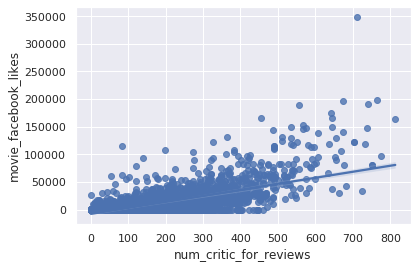

In [0]:
train_test_drop3('num_critic_for_reviews','num_user_for_reviews',123)
ax = sns.regplot(x='num_critic_for_reviews', y='movie_facebook_likes', data=filled_drop3)

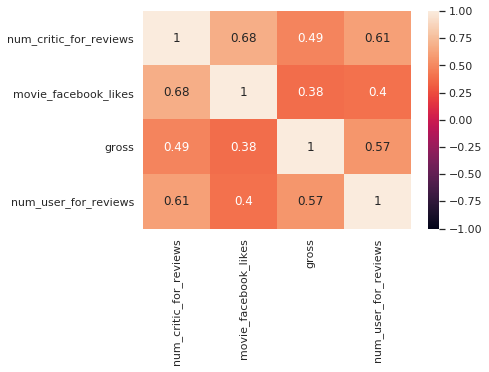

In [0]:
drop2 = selected_cols.dropna(thresh=2)
filled_drop2 = drop2.fillna(drop2.median())
corr_drop2 = filled_drop2.corr(method ='pearson')
sns.set()
c = sns.heatmap(corr_drop2, vmin=-1, vmax=1,annot=True)

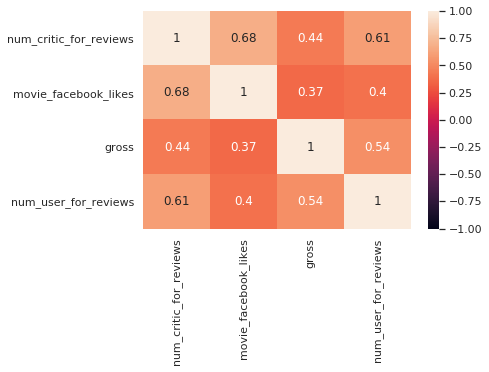

In [0]:
filled_mean = selected_cols.fillna(selected_cols.mean())
corr_mean = filled_mean.corr(method ='pearson')
sns.set()
c = sns.heatmap(corr_mean, vmin=-1, vmax=1,annot=True)